In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
sum(data["Age"].isna()),data.shape

(177, (891, 12))

In [6]:
# filling nan with mean value
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Frequency Distributions

In [8]:
# Sex vs. Death
maleS = data["Survived"][data["Sex"] == "male"].value_counts().to_dict()
femaleS = data["Survived"][data["Sex"] == "female"].value_counts().to_dict()

In [9]:
Sex_vs_death_freq = pd.DataFrame({"Sex":["male","female"],"Not Survived":[maleS[0],femaleS[0]],"Survived":[maleS[1],femaleS[1]]})
Sex_vs_death_freq["Total"] = Sex_vs_death_freq["Survived"] + Sex_vs_death_freq["Not Survived"]

In [10]:
Sex_vs_death_freq

,Sex,Not Survived,Survived,Total
0,male,468,109,577
1,female,81,233,314


<AxesSubplot: xlabel='Sex'>

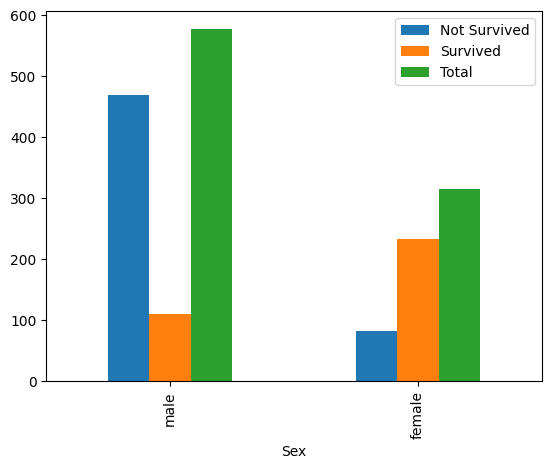

In [11]:
Sex_vs_death_freq.plot(x="Sex",kind="bar")

In [12]:
# Age vs. Death (Grouped)
data["Age"].max()

80.0

In [13]:
age_bins = range(0,81,10)
Age_vs_Death_freq=  data.groupby([pd.cut(data["Age"],age_bins),"Survived"])["Survived"].count().unstack()
Age_vs_Death_freq["Total"] = Age_vs_Death_freq[0] + Age_vs_Death_freq[1]
Age_vs_Death_freq = Age_vs_Death_freq.rename(columns={0:"Not Survived",1:"Survived"}).reset_index().rename_axis(None, axis=1)

In [14]:
Age_vs_Death_freq

,Age,Not Survived,Survived,Total
0,"(0, 10]",26,38,64
1,"(10, 20]",71,44,115
2,"(20, 30]",271,136,407
3,"(30, 40]",86,69,155
4,"(40, 50]",53,33,86
5,"(50, 60]",25,17,42
6,"(60, 70]",13,4,17
7,"(70, 80]",4,1,5


In [15]:
sum(Age_vs_Death_freq["Total"])

891

<AxesSubplot: xlabel='Age'>

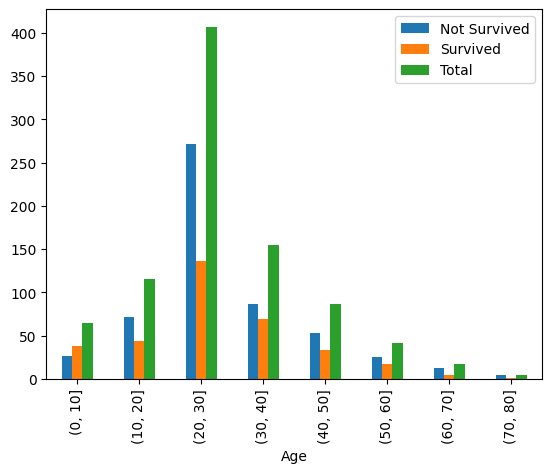

In [16]:
Age_vs_Death_freq.plot(x="Age",kind="bar")

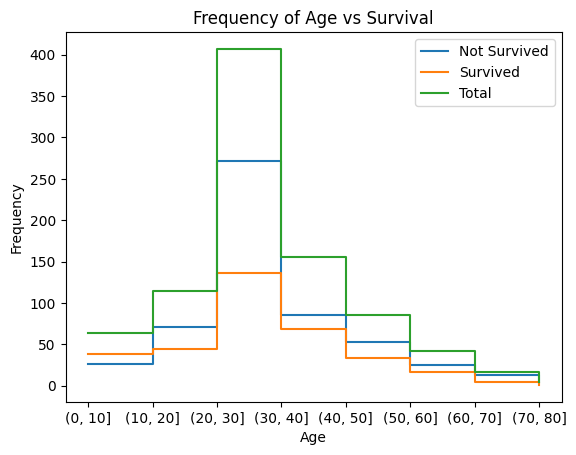

In [17]:
Age_vs_Death_freq.plot(x="Age",kind='line', drawstyle='steps-post')
plt.title('Frequency of Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Describing Data with Averages (Mean,Median,Mode)

In [18]:
data_quant = data[["Survived","Age","SibSp","Parch","Fare"]]

In [19]:
meanq = data_quant.mean()
medianq = data_quant.median()
modeq = data_quant.mode().iloc[0]

In [20]:
pd.concat([meanq, medianq, modeq], axis=1, keys=['mean', 'median', 'mode'])


,mean,median,mode
Survived,0.383838,0.000000,0.000000
Age,29.699118,29.699118,29.699118
SibSp,0.523008,0.000000,0.000000
Parch,0.381594,0.000000,0.000000
Fare,32.204208,14.454200,8.050000


In [21]:
# Mode is always the best for qualitative data
data_qual = data[["Sex","Pclass","Cabin","Embarked"]]

In [22]:
meanc = data_qual.mean(numeric_only=True)
medianc = data_qual.median(numeric_only=True)
modec = data_qual.mode().iloc[0]

In [23]:
pd.concat([meanc, medianc, modec], axis=1, keys=['mean', 'median', 'mode'])

,mean,median,mode
Pclass,2.308642,3.0,3.0
Sex,NaN,NaN,male
Cabin,NaN,NaN,B96 B98
Embarked,NaN,NaN,S


# Describing variability ($\sigma^2$(var), $\sigma$(std) & IQR)

In [24]:
var = lambda X,X_bar: np.sum((X-X_bar)**2)/len(X)
std = lambda v : np.sqrt(v)
# iqr = q3 - q1

In [25]:
age_mean = data['Age'].mean()
age_median = data['Age'].median()
age_var = var(data["Age"],age_mean)
age_std = std(age_var)
age_q1 = data["Age"].quantile(0.25)
age_q3 = data["Age"].quantile(0.75)
age_iqr = age_q3 - age_q1

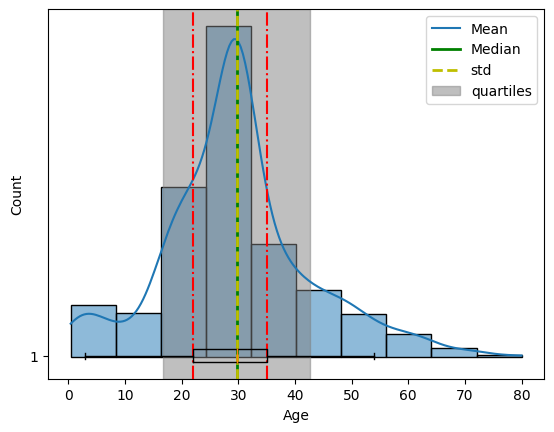

In [26]:
sns.histplot(data["Age"], bins=10,kde=True)
plt.axvline(age_mean, color='g', linestyle='-', linewidth=2)
plt.axvline(age_median, color='y', linestyle='--', linewidth=2)
plt.axvspan(age_mean - age_std, age_mean + age_std, alpha=0.5, color='gray')
plt.axvline(age_q1, color='r', linestyle='-.')
plt.axvline(age_q3, color='r', linestyle='-.')
plt.boxplot(data["Age"], vert=False,widths=age_iqr ,showfliers=False)
plt.legend(['Mean',"Median" ,'std',"quartiles"])
plt.show()

In [27]:
fare_mean = data['Fare'].mean()
fare_median = data["Fare"].median()
fare_var = var(data["Fare"],fare_mean)
fare_std = std(fare_var)
fare_q1 = data["Fare"].quantile(0.25)
fare_q3 = data["Fare"].quantile(0.75)
fare_iqr = fare_q3 - fare_q1

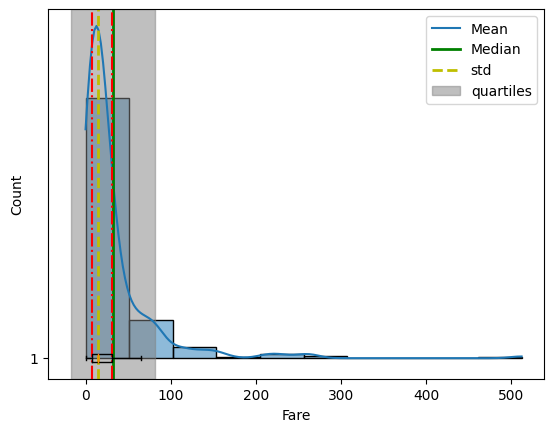

In [28]:
sns.histplot(data["Fare"], bins=10,kde=True)
plt.axvline(fare_mean, color='g', linestyle='-', linewidth=2)
plt.axvline(fare_median, color='y', linestyle='--', linewidth=2)
plt.axvspan(fare_mean - fare_std, fare_mean + fare_std, alpha=0.5, color='gray')
plt.axvline(fare_q1, color='r', linestyle='-.')
plt.axvline(fare_q3, color='r', linestyle='-.')
plt.boxplot(data["Fare"], vert=False,widths=fare_iqr,showfliers=False)
plt.legend(['Mean',"Median" ,'std',"quartiles"])
plt.show()

We can see that the Age frequency has normal curve and the Fare frequency has positively skewed normal curve.

## Z Score
$$
Z = \frac {X -\mu} {\sigma}
$$
1.  a positive or negative sign indicating whether it’s above or below the mean; and
2.  a number indicating the size of its deviation from the mean in standard deviation units.

converting back to original data:
$$
X = \mu + (z)(\sigma)
$$

In [29]:
Z_score = lambda X,mu,sigma: (X-mu)/sigma

In [30]:
age_zscore = Z_score(data["Age"],age_mean,age_std)
fare_zscore = Z_score(data["Fare"],fare_mean,fare_std)

In [31]:
# for a standard distribution the mean and std should be 0 and 1
print(np.mean(age_zscore),np.std(age_zscore))
print(np.mean(fare_zscore),np.std(fare_zscore))

2.2329064647904385e-16 1.0
3.987332972840069e-18 1.0


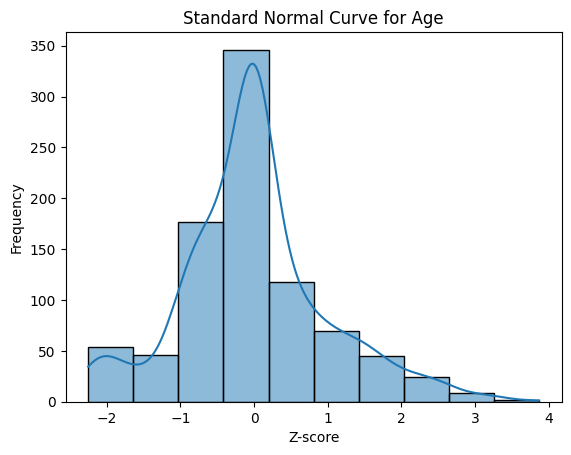

In [32]:
sns.histplot(age_zscore, bins=10,kde=True)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Standard Normal Curve for Age')
plt.show()

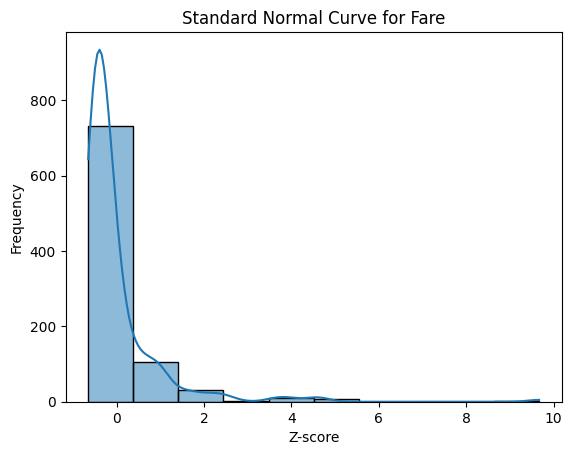

In [33]:
sns.histplot(fare_zscore, bins=10,kde=True)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Standard Normal Curve for Fare')
plt.show()


## Correlation ($r$)
$$
r = \frac {SP_{xy}} {\sqrt{SS_x SS_y}}
$$
[-1 to 1]
- The sign of r indicates the type of linear relationship, whether positive or negative.
- The numerical value of r, without regard to sign, indicates the strength of the linear relationship.

In [34]:
def r_coef(X,Y):
    dev_X,dev_Y = X-X.mean(), Y-Y.mean() 
    SP_xy = np.sum(dev_X*dev_Y)
    SS_x,SS_y = np.sum(dev_X**2),np.sum(dev_Y**2)
    return SP_xy / np.sqrt(SS_x*SS_y)

encoding the categorical variables with integers

In [35]:
data["Sex"] = data["Sex"].replace({"male":1,"female":0})
data["Embarked"] = data["Embarked"].replace({"S":0,"C":1,"Q":2})
data["Embarked"].fillna(int(data["Embarked"].mode()),inplace=True)

In [36]:
# we encoded the categories to numbers and filled nan values
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [37]:
# Lets check age and Fare are correlated
r_coef(data["Age"],data["Fare"])

0.09156609328505763

In [38]:
# Lets check age and Pclass are correlated
r_coef(data["Age"],data["Pclass"])

-0.3313387740824211

In [39]:
# Lets check Fare and Pclass are correlated
r_coef(data["Fare"],data["Pclass"])

-0.5494996199439078

In [40]:
# lets see the correlation matrix
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


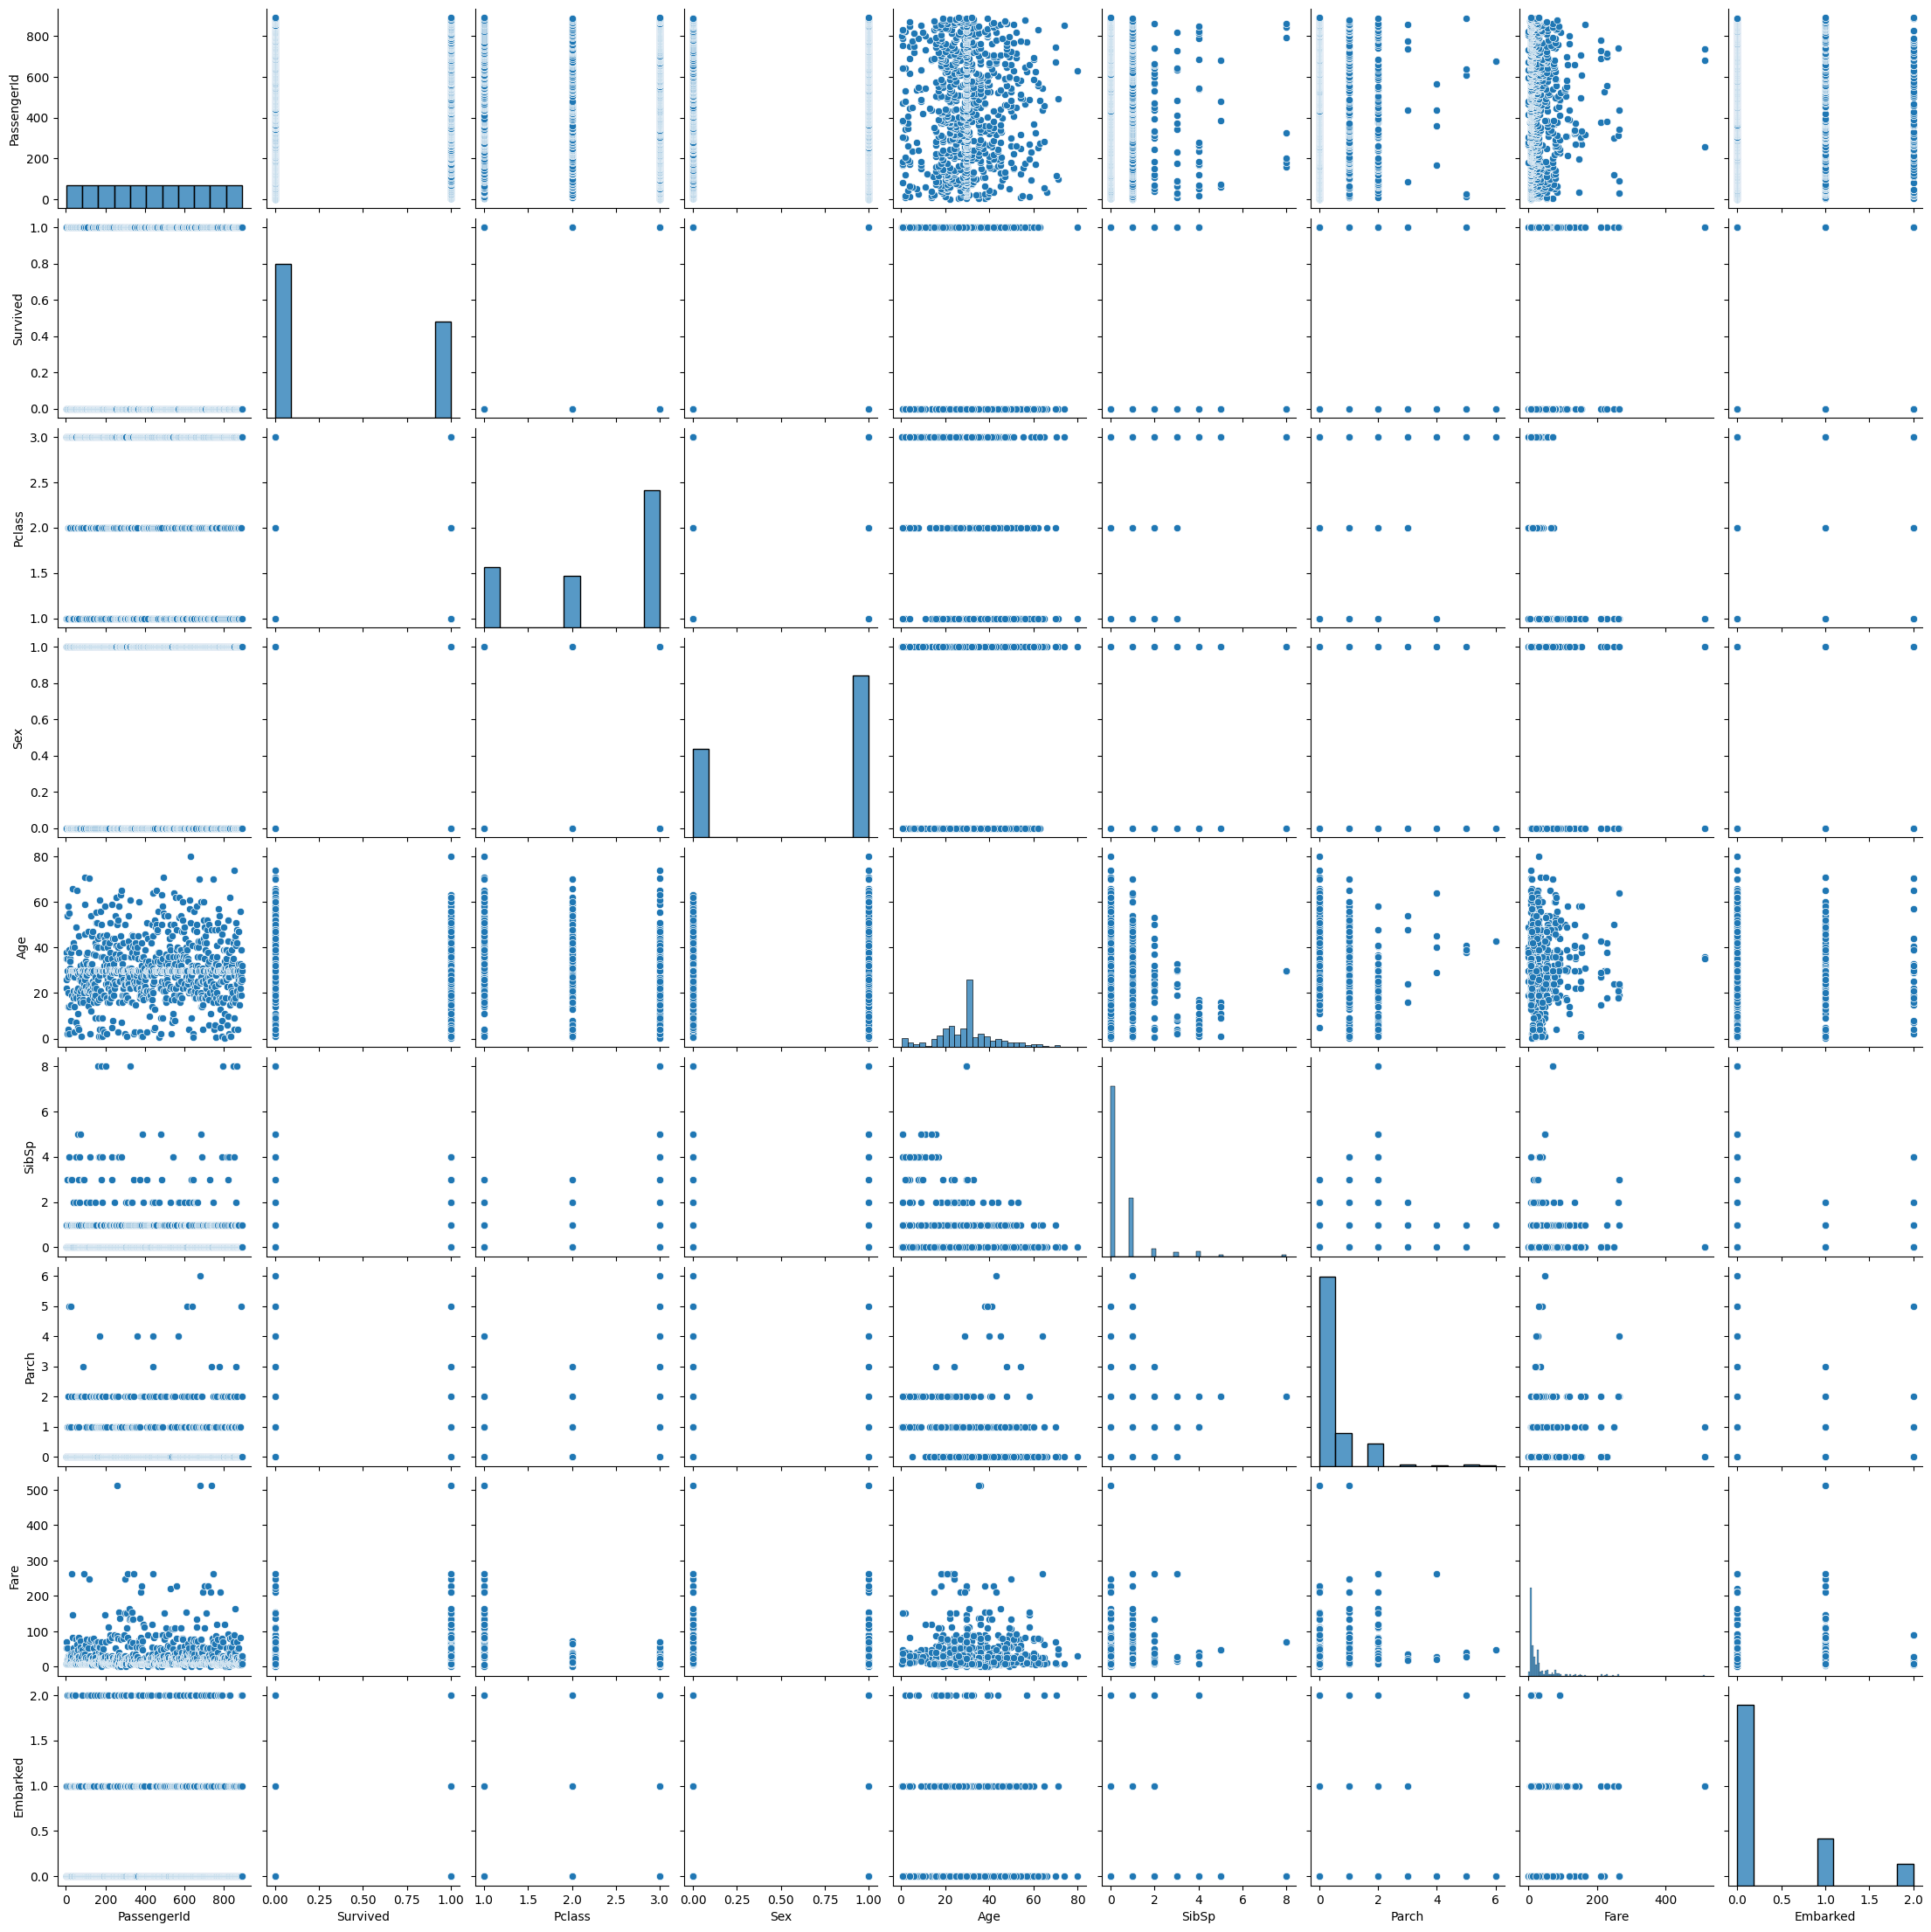

In [41]:
# lets view the pair plot
sns.pairplot(data)

# Regression

Least Squares Regression Equation:
$$
Y' = bX +a
$$
where, 
$$
b = r\sqrt{\frac {SS_x}{SS_y}}
$$
and
$$
a = \bar Y - b* \bar X
$$
standard error estimate $S_{y|x}$:

$$
= \sqrt {\frac {\sum (Y- Y')^2} {n-2}}
$$

In [42]:
def LSR(X,Y):
    dev_X,dev_Y = X-X.mean(), Y-Y.mean() 
    SP_xy = np.sum(dev_X*dev_Y)
    SS_x,SS_y = np.sum(dev_X**2),np.sum(dev_Y**2)
    r = SP_xy / np.sqrt(SS_x*SS_y)
    b = r* np.sqrt(SS_y/SS_x)
    a = Y.mean() - b *X.mean()    
    return b,a

In [43]:
SEE = lambda Y,Y_dash: np.sqrt(np.sum((Y-Y_dash)**2)/(len(Y)-2))

In [44]:
b,a = LSR(data["Age"],data["Fare"])

In [45]:
Y_pred = b*data["Age"]+a
see = SEE(data["Fare"],Y_pred)

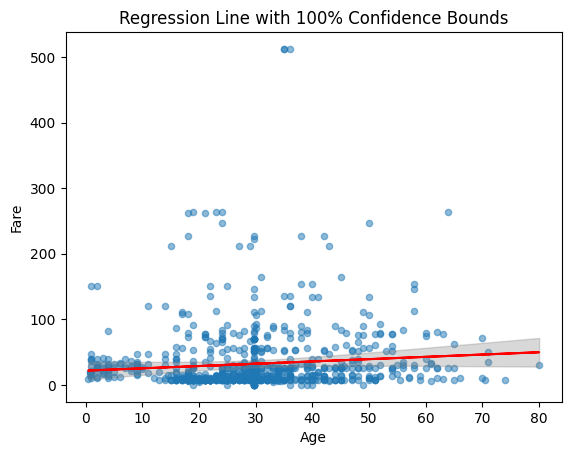

In [47]:
data.plot(x="Age",y="Fare",kind="scatter",alpha=0.5)
plt.plot(data["Age"],Y_pred,color="r")

# Calculate and plot confidence interval
x_new = np.linspace(data["Age"].min(), data["Age"].max(), 100)
y_pred = b*x_new + a
s_x = np.sqrt(np.sum((data["Age"] - np.mean(data["Age"]))**2) / (len(data["Age"]) - 1))
t = 3.291 # 100%; 1.96 for 95% 
CI = t * see * np.sqrt(1/len(data["Age"]) + (x_new - np.mean(data["Age"]))**2 / ((len(data["Age"])-1)*s_x**2))
plt.fill_between(x_new, y_pred - CI, y_pred + CI, color='gray', alpha=0.3)

plt.title("Regression Line with 100% Confidence Bounds")
plt.show()
